In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задания из методички

In [4]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

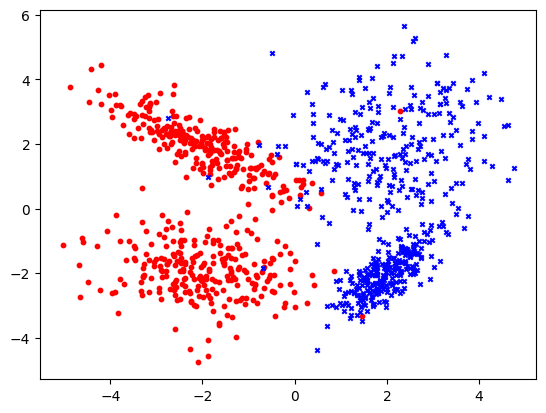

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=10)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=10)
plt.show()

In [6]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b_ = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b_)
            b_ = self.gradient_step(b_, b_grad)
        return b_
    def fit(self, X, y):
        #X = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        #X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [7]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [8]:
from sklearn.metrics import accuracy_score, f1_score

In [9]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [10]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

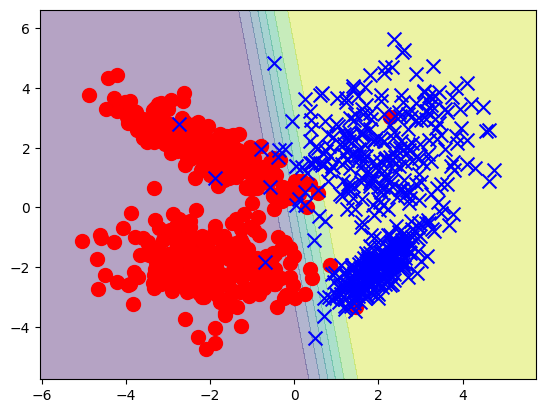

In [11]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

#самостоятельная работа

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [12]:
from sklearn import linear_model

In [13]:
model = linear_model.LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

In [14]:
print(f'my model  accuracy = {ac:.2f} F1-score = {f1:.2f}')
print(f'sklearn model accuracy = {accuracy_score(y, y_pred_lr):.2f}  F1-score = {f1_score(y, y_pred_lr):.2f}') #видим что одинаковы

my model  accuracy = 0.98 F1-score = 0.98
sklearn model accuracy = 0.98  F1-score = 0.98


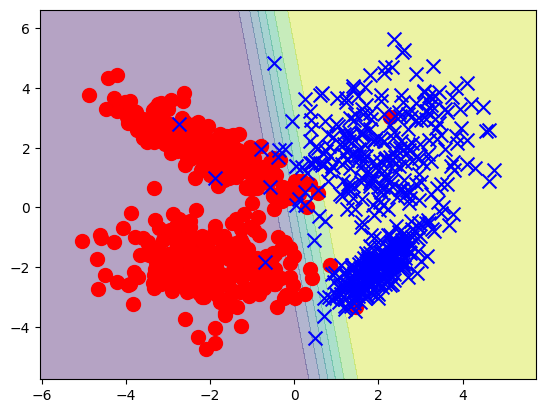

In [ ]:
xx_lr, yy_lr = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.c_[np.ones(xx_lr.ravel().shape), xx_lr.ravel(), yy_lr.ravel()]

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx_lr, yy_lr, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
model.coef_[0]

array([1.57076264e-05, 3.11346842e+00, 3.98985587e-01])

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.grad_step = []
        self.grad_value = []
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b_ = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b_)
            b_ = self.gradient_step(b_, b_grad)
            self.grad_step.append(i)
            self.grad_value.append(b_grad)
        return b_
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):

        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [ ]:
logreg = LogReg(alpha = 0.02, n_iters=100)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.95 F1-score = 0.95


 alpha = 0.02, n_iters=100

accuracy = 0.92 F1 = 0.92

alpha = 0.5, n_iters=1000

accuracy = 0.98 F1 = 0.98

<ipython-input-8-08d2938eebc6>:25: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


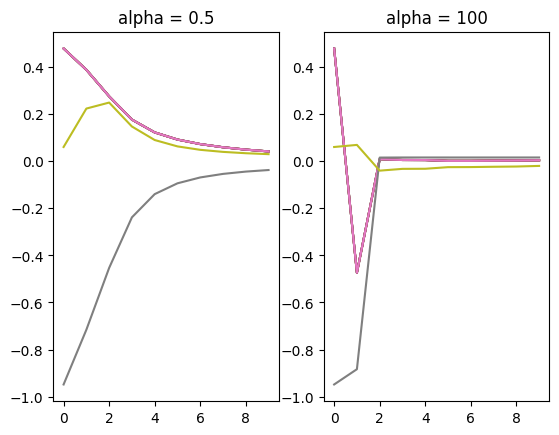

In [ ]:
logreg_norm = LogReg(alpha = 0.5, n_iters=100)
logreg = LogReg(alpha = 100, n_iters=100)

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg_norm.fit(X, y)
logreg.fit(X,y)

fig, axis = plt.subplots(1, 2)
axis[0].plot(logreg_norm.grad_step[:10], logreg_norm.grad_value[:10])
axis[1].plot(logreg.grad_step[:10], logreg.grad_value[:10])

axis[0].set_title('alpha = 0.5')
axis[1].set_title('alpha = 100')

plt.show()

3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b_ = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b_)
            b_ = self.gradient_step(b_, b_grad)
        return b_
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X]) #added line

        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X]) #added line
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [ ]:
logreg = LogReg(alpha = 0.5, n_iters=1000)
logreg.fit(X, y)
y_pred = logreg.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
print(f'Количество признаков: {X.shape[1]},  Количество параметров b: {len(logreg.b)}')

Количество признаков: 4,  Количество параметров b: 5


4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [ ]:
from sklearn.datasets import make_classification
X3,y3 = make_classification (n_samples=1000, n_features=2,n_redundant=0,n_classes=2,class_sep=3,random_state=1)

X6,y6 = make_classification (n_samples=1000, n_features=2,n_informative=2,n_redundant=0,n_classes=2,class_sep=6,random_state=1)

X10,y10 = make_classification (n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,class_sep=10,random_state=1)

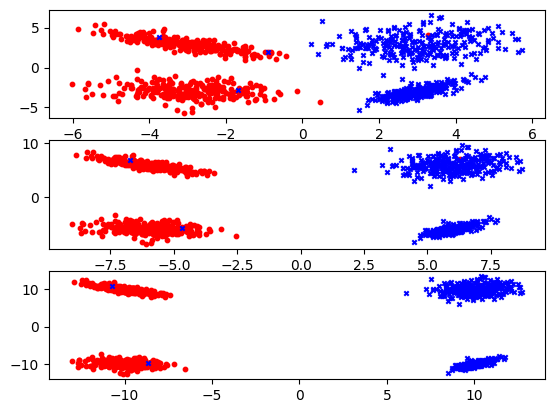

In [ ]:
figure, axs = plt.subplots(3,1)

axs[0].scatter(X3[:, 0][y3==0], X3[:, 1][y3==0], marker="o", c='r', s=10)
axs[0].scatter(X3[:, 0][y3==1], X3[:, 1][y3==1], marker="x", c='b', s=10)

axs[1].scatter(X6[:, 0][y6==0], X6[:, 1][y6==0], marker="o", c='r', s=10)
axs[1].scatter(X6[:, 0][y6==1], X6[:, 1][y6==1], marker="x", c='b', s=10)

axs[2].scatter(X10[:, 0][y10==0], X10[:, 1][y10==0], marker="o", c='r', s=10)
axs[2].scatter(X10[:, 0][y10==1], X10[:, 1][y10==1], marker="x", c='b', s=10)

plt.show()

Чем больше параметр class_sep, тем дальше друг от друго находятся элементы разных классов

Соответственно предсказания модели будут более точными при больших значениях class_sep

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [ ]:
X,y = make_classification (n_samples=1000, n_features=10,  n_informative=5, n_redundant=0, n_classes=2, class_sep=2, random_state=1)#chenged value

logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.91 F1-score = 0.91


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b0 = None
        self.b1 = None
        self.b2 = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b_ = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b_)
            b_ = self.gradient_step(b_, b_grad)
        return b_
    def fit(self, X, y, b):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

    def fit_multi(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        data = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['Label'])], axis=1)
        num_classes = len(pd.unique(data.Label))
        for i in range(num_classes):
          data['y'+str(i)] = np.where(data['Label'] == i, 1, 0)

        fitures = data.iloc[:, :-num_classes-1].to_numpy()

        self.fit(fitures, data.iloc[:, -num_classes].to_numpy(), self.b0)
        self.fit(fitures, data.iloc[:, -num_classes+1].to_numpy(), self.b1)
        self.fit(fitures, data.iloc[:, -num_classes+2].to_numpy(), self.b2)





class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X, b):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, b)
    def predict(self, X):
      max_p = 0
      i = 0
      list_b = [self.b0, self.b1, self.b2]
      for i in range(len(list_b)):
        print(self.predict_proba(X, i))
        if self.predict_proba(X, i) >= max_p:
          max_p = i
      return max_p





In [ ]:
data


,0,1,2,3,4,Label,y1,y0,y2
0,0.429550,-2.995408,-3.000489,-2.015779,-2.161366,1,1,0,0
1,2.651829,-2.781966,-1.884227,1.661826,0.651881,1,1,0,0
2,-0.321638,2.199024,1.718427,1.734913,2.286991,0,0,1,0
3,-1.268912,2.146765,-1.577587,1.775359,5.324903,0,0,1,0
4,-1.511390,2.423431,-2.360559,2.181671,6.722934,0,0,1,0
...,...,...,...,...,...,...,...,...,...
95,1.965469,-2.439901,2.924359,-1.703763,-6.788196,2,0,0,1
96,0.178823,2.393942,1.652211,2.955138,3.746308,0,0,1,0
97,1.674864,-1.233275,-2.274283,2.421130,3.285695,1,1,0,0
98,0.658187,1.127295,2.968788,1.213708,-0.438509,0,0,1,0


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100,
                           n_features=5,
                           n_classes=3,
                           n_informative=3,
                           n_repeated=0,
                           class_sep=2,
                           random_state=1)
data = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['Label'])], axis=1)
data.head()

,0,1,2,3,4,Label
0,0.429550,-2.995408,-3.000489,-2.015779,-2.161366,1
1,2.651829,-2.781966,-1.884227,1.661826,0.651881,1
2,-0.321638,2.199024,1.718427,1.734913,2.286991,0
3,-1.268912,2.146765,-1.577587,1.775359,5.324903,0
4,-1.511390,2.423431,-2.360559,2.181671,6.722934,0


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class = 'ovr').fit(X, y)


ac = accuracy_score(y, clf.predict(X))
print(f'accuracy = {ac:.2f}')

accuracy = 0.88


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [ ]:
pd.DataFrame(columns=['Класс 0', 'Класс 1', 'Класс 2'], data = clf.predict_proba(X)*100).head()


,Класс 0,Класс 1,Класс 2
0,0.000048,84.995763,15.004189
1,0.202087,99.660429,0.137485
2,93.763441,0.217591,6.018968
3,93.865440,4.757186,1.377375
4,92.476320,6.971329,0.552351
